## Project: Investigating TMDB Dataset


### Table of Contents

 #### 1. Introduction
 #### 2.Data Wrangling
 #### 3.Exploratory Data Analysis
 #### 4.Conclusions


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving tmdb_movies.csv to tmdb_movies.csv


In [ ]:
#loading the dataset
movie_df = pd.read_csv('tmdb_movies.csv')
movie_df.head().T

,0,1,2,3,4
id,135397,76341,262500,140607,168259
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852
popularity,32.985763,28.419936,13.112507,11.173104,9.335014
budget,150000000,150000000,110000000,200000000,190000000
revenue,1513528810,378436354,295238201,2068178225,1506249360
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home


## ASSESSING THE DATASET

In [ ]:
movie_df.shape

(10866, 21)

In [ ]:
#viewing what columns the dataset contains
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
#viewing the statistical description of the dataset
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:



#viewing the datatypes of thr given dataset
movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

## DATA CLEANING

In [ ]:


# checking for null values
movie_df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:

movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [ ]:
movie_df.head(5).T

,0,1,2,3,4
id,135397,76341,262500,140607,168259
imdb_id,tt0369610,tt1392190,tt2908446,tt2488496,tt2820852
popularity,32.985763,28.419936,13.112507,11.173104,9.335014
budget,150000000,150000000,110000000,200000000,190000000
revenue,1513528810,378436354,295238201,2068178225,1506249360
original_title,Jurassic World,Mad Max: Fury Road,Insurgent,Star Wars: The Force Awakens,Furious 7
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
homepage,http://www.jurassicworld.com/,http://www.madmaxmovie.com/,http://www.thedivergentseries.movie/#insurgent,http://www.starwars.com/films/star-wars-episod...,http://www.furious7.com/
director,Colin Trevorrow,George Miller,Robert Schwentke,J.J. Abrams,James Wan
tagline,The park is open.,What a Lovely Day.,One Choice Can Destroy You,Every generation has a story.,Vengeance Hits Home


In [ ]:
#dropping unnecessary columns (budget and revenue)
movie_df.drop(['budget','revenue','homepage','tagline'], axis = 1, inplace =True)

In [ ]:
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'original_title', 'cast', 'director',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [ ]:
movie_df.duplicated().sum()

1

In [ ]:

#removing null values frommthe dataset
movie_df.drop_duplicates(keep = False,inplace = True)

## QUESTIONS

#### 1. What genres were the most popular ?
#### 2.Does having a popular cast  in the movie affect the profit of the movie?
#### 3. What production company produced the most movies?
#### 4. Does having a top production company making your movie affect its revenue? 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa90b23e5d0>,
      dtype=object)

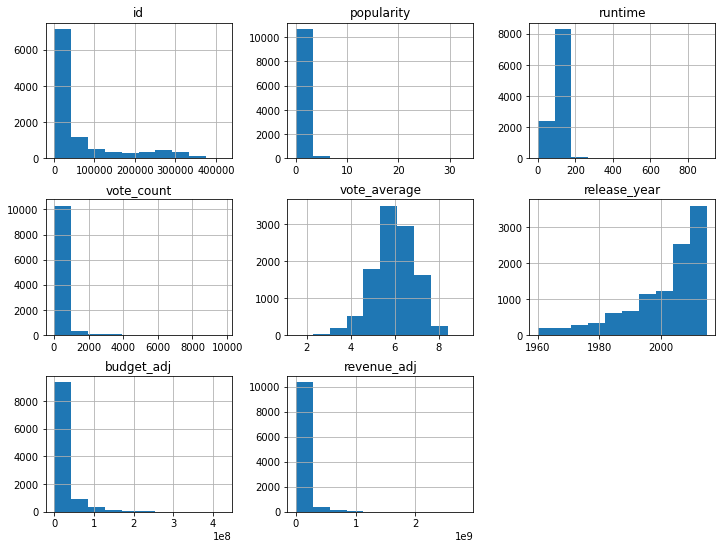

In [ ]:
movie_df.hist(figsize =(12,9))





##### The hist() function return the histogram of the different groups of data in the movie dataset 

### QUESTION 1
#### WHICH GENRE IS THE MOST POPULAR?

In [ ]:
#indexing the 'genres' column in the dataframe individually and breaking them into unique values and then combining them 
movie_genre = movie_df['genres'].str.cat(sep = '|')
movie_genre

'Action|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Thriller|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Fantasy|Action|Crime|Thriller|Western|Drama|Adventure|Thriller|Science Fiction|Action|Thriller|Adventure|Drama|Adventure|Science Fiction|Family|Animation|Adventure|Comedy|Comedy|Animation|Family|Action|Adventure|Crime|Science Fiction|Fantasy|Action|Adventure|Drama|Science Fiction|Action|Comedy|Science Fiction|Action|Adventure|Science Fiction|Crime|Drama|Mystery|Western|Crime|Action|Thriller|Science Fiction|Action|Adventure|Romance|Fantasy|Family|Drama|War|Adventure|Science Fiction|Action|Family|Science Fiction|Adventure|Mystery|Action|Drama|Action|Drama|Thriller|Drama|Romance|Comedy|Drama|Action|Comedy|Crime|Comedy|Action|Adventure|Drama|Thriller|History|Action|Science Fiction|Thriller|Mystery|Drama|Crime|Action|Science Fiction|Comedy|Music|Thriller|Drama|Adventure|Horror|Comedy|Drama|Thriller|Crime|Drama|Mystery|Adventure|Animation|Co

In [ ]:
#putting the output of the combination of all genres in a pandas series
movie_genre_df = pd.Series(movie_genre.split('|'))
movie_genre_df

0                 Action
1              Adventure
2        Science Fiction
3               Thriller
4                 Action
              ...       
26945            Mystery
26946             Comedy
26947             Action
26948             Comedy
26949             Horror
Length: 26950, dtype: object

In [ ]:
#getting the number of values for the unique values
genre_ = movie_genre_df.value_counts()
genre_

Drama              4759
Comedy             3793
Thriller           2906
Action             2383
Romance            1712
Horror             1637
Adventure          1471
Crime              1353
Family             1231
Science Fiction    1228
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

In [ ]:
#turning the series function to a pandas single_column dataframe and naming it
genre_df =pd.DataFrame(genre_,columns =['Number of appearances'] )
genre_df.head(10)
# Drama has the highest occurence, hence making it the most popular 

,Number of appearances
Drama,4759
Comedy,3793
Thriller,2906
Action,2383
Romance,1712
Horror,1637
Adventure,1471
Crime,1353
Family,1231
Science Fiction,1228


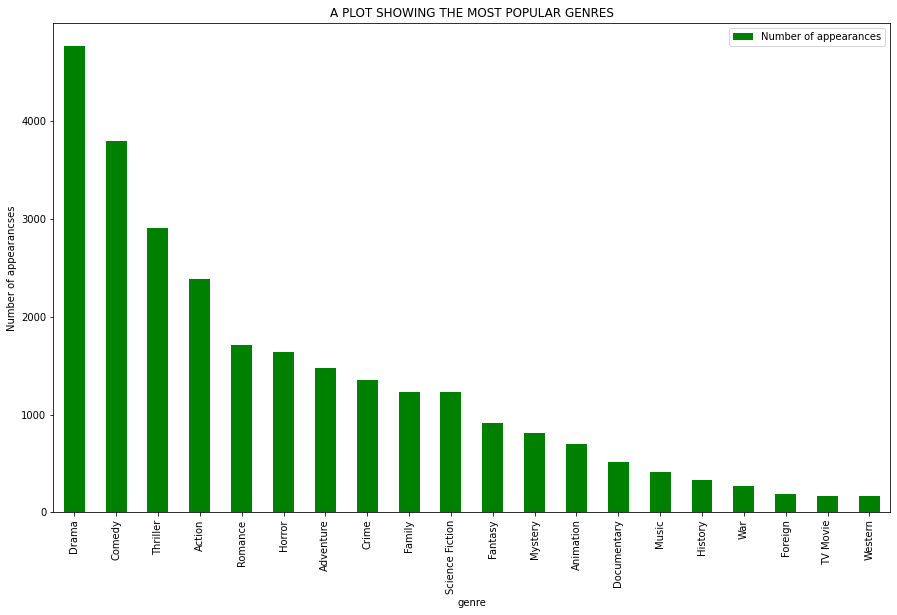

In [ ]:
#visualizing the results with a barplot
genre_df.plot(kind = 'bar', figsize = (15,9), color = 'g' , xlabel = 'genre', ylabel = 'Number of appearancses', title = 'A PLOT SHOWING THE MOST POPULAR GENRES')

##### The barchart above shows a level of popularity among the genres following the decending order.
##### This was gotten by the number of appearances a genre made in the movie dataset

## QUESTION 2
#### Does having a popular cast  in the movie affect the profit of the movie?

In [ ]:
#putting the output of the combination of all genres in a pandas series
movie_genre_df = pd.Series(movie_genre.split('|'))
movie_genre_df
movie_cast = movie_df['cast'].str.cat(sep = '|')
movie_cast_df = pd.Series(movie_cast.split('|'))

In [ ]:
cast_ = movie_cast_df.value_counts().head(50)

In [ ]:
#turning the series to a one-column dataframe and naming the column
cast_df =pd.DataFrame(cast_,columns =['Number of times acted'] ).head(50)

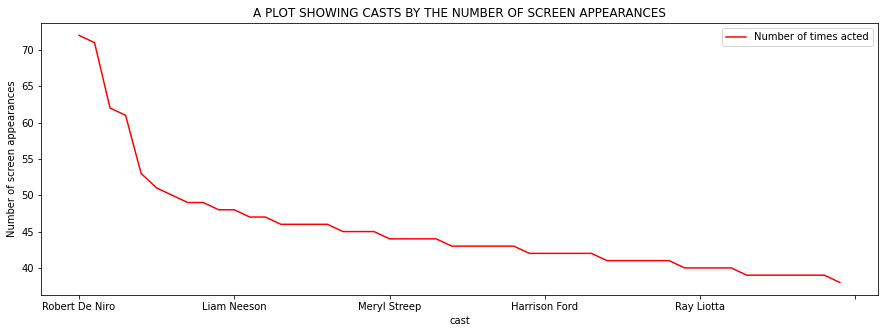

In [ ]:
#visualizing the data with a lineplot 
cast_df.plot( figsize = (15,5),color = 'r', xlabel = 'cast', ylabel = 'Number of screen appearances', title = 'A PLOT SHOWING CASTS BY THE NUMBER OF SCREEN APPEARANCES')

In [ ]:
#sorting the dataframe in a descending order
grouped = movie_df.sort_values(['popularity'],ascending=False).head(10)
#grouping by the columns in the dataframe we need for our analysis 
movie_grouped = grouped[['original_title','cast', 'popularity','budget_adj','revenue_adj']]

movie_grouped

,original_title,cast,popularity,budget_adj,revenue_adj
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,32.985763,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,28.419936,1.379999e+08,3.481613e+08
629,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,24.949134,1.519800e+08,5.726906e+08
630,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,14.311205,1.565855e+08,7.122911e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,13.112507,1.012000e+08,2.716190e+08
631,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,12.971027,1.565855e+08,6.583651e+08
1329,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,12.037933,3.957559e+07,2.789712e+09
632,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,11.422751,1.842182e+07,7.252661e+07
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,11.173104,1.839999e+08,1.902723e+09
633,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,10.739009,1.151364e+08,6.927528e+08


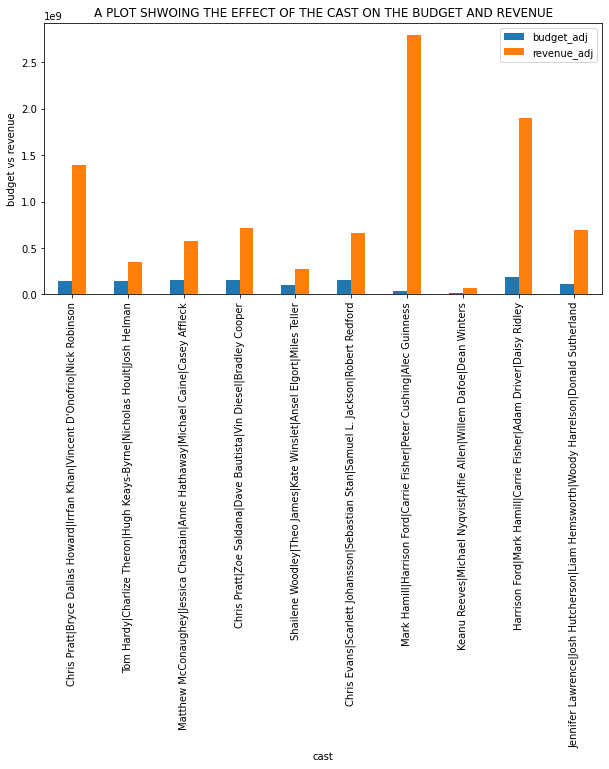

In [ ]:
#visualizing the grouped data
movie_grouped.plot(kind = 'bar',x='cast', y=['budget_adj', 'revenue_adj'], figsize=(10,5),xlabel = 'cast',ylabel = 'budget vs revenue', title = 'A PLOT SHWOING THE EFFECT OF THE CAST ON THE BUDGET AND REVENUE')

##### This chart shows the relationship and effect of the cast(actor) on the movie. It answered the question "does the cast have any effect on the budget and revenue of the movie. It sought to check if the popularity of a cast made the movie revenue more, but it didn't as movies that had actors with the most appearances weren't necessarily part of the most popular movies  with high revenues. 
##### It also shows that higher budget didn't necessarily mean higher revenue



## QUESTION THREE
#### WHAT PRODUCTION COMPANY PRODUCED THE MOST MOVIES?

In [ ]:
#separating the column in the dataset and combining it in a series
movie_pc = movie_df['production_companies'].str.cat(sep = '|')

In [ ]:
movie_pc_df = pd.Series(movie_pc.split('|'))
#putting it in a pandas series

In [ ]:
movie_ = movie_pc_df.value_counts().head(20)
movie_t = pd.DataFrame(movie_,columns = ['Highest appearance'])

movie_t
#turning the pandas series to a single_column dataframe

,Highest appearance
Universal Pictures,522
Warner Bros.,509
Paramount Pictures,431
Twentieth Century Fox Film Corporation,282
Columbia Pictures,272
New Line Cinema,219
Metro-Goldwyn-Mayer (MGM),218
Walt Disney Pictures,214
Touchstone Pictures,178
Columbia Pictures Corporation,160


Text(0.5, 1.0, 'A PLOT SHOWING THE COMPANY WITH THE HIGHEST PRODUCTIONS')

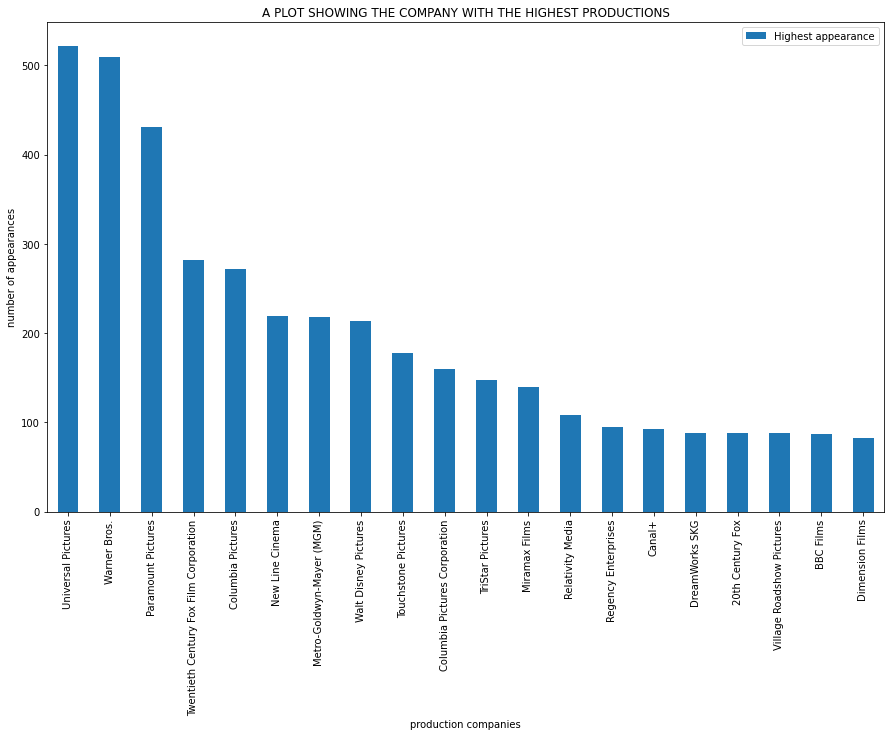

In [ ]:
run = movie_t.plot(kind = 'bar', figsize = (15,9))
plt.xlabel('production companies')
plt.ylabel('number of appearances')
plt.title ('A PLOT SHOWING THE COMPANY WITH THE HIGHEST PRODUCTIONS' )

##### The chart above shows the top 20 companies that had the highest productions according to the number of their appearances in movie poduction  





##  QUESTION FOUR
#### Does having a top production company making your movie affect its revenue?

In [ ]:
#grouping by the columns in the dataframe we need for our analysis 
grouped_ = movie_df.sort_values(['revenue_adj'],ascending=False).head(10)
revenue = grouped_[['production_companies','budget_adj','revenue_adj']]
revenue

,production_companies,budget_adj,revenue_adj
1386,Ingenious Film Partners|Twentieth Century Fox ...,2.408869e+08,2.827124e+09
1329,Lucasfilm|Twentieth Century Fox Film Corporation,3.957559e+07,2.789712e+09
5231,Paramount Pictures|Twentieth Century Fox Film ...,2.716921e+08,2.506406e+09
10594,Warner Bros.|Hoya Productions,3.928928e+07,2.167325e+09
9806,Universal Pictures|Zanuck/Brown Productions,2.836275e+07,1.907006e+09
3,Lucasfilm|Truenorth Productions|Bad Robot,1.839999e+08,1.902723e+09
8889,Universal Pictures|Amblin Entertainment,2.372625e+07,1.791694e+09
8094,Columbia Pictures,3.148127e+07,1.583050e+09
10110,Walt Disney Productions,2.917944e+07,1.574815e+09
4361,Marvel Studios,2.089437e+08,1.443191e+09


<AxesSubplot:title={'center':'A PLOT SHOWING THE EFFECT OF THE PRODUCTION'}, xlabel='production companies', ylabel='Budget vs Revenue'>

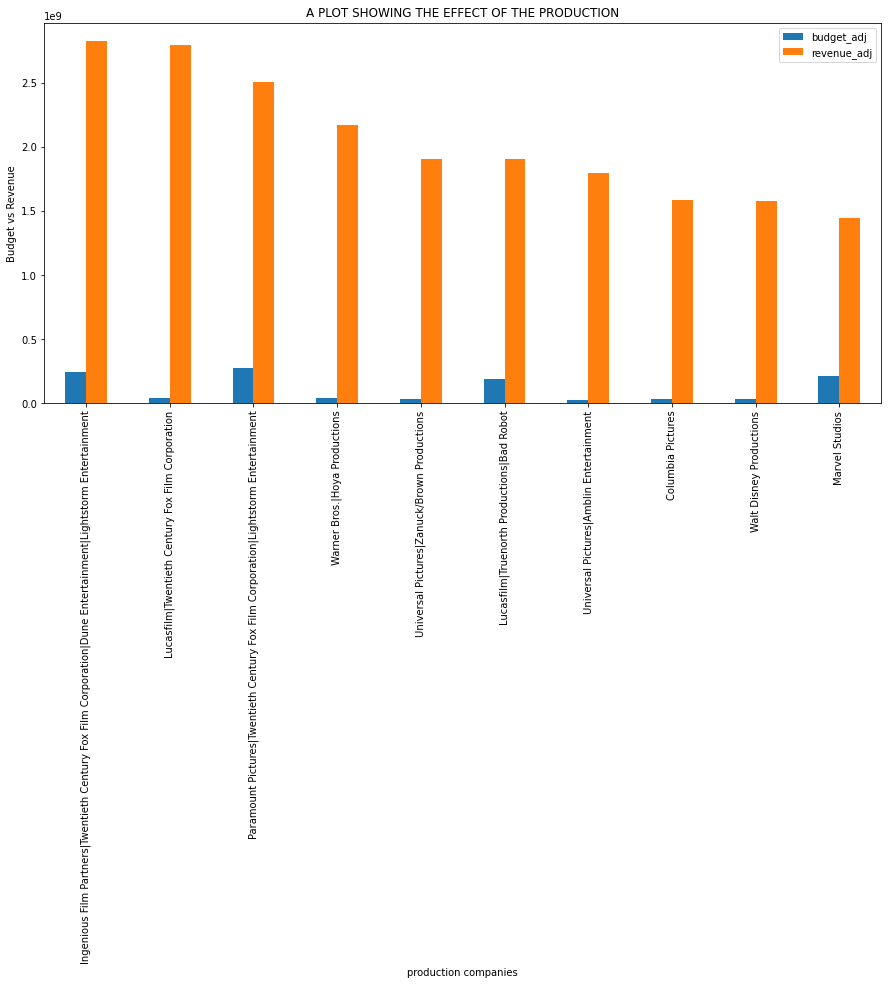

In [ ]:
#visualizing 
revenue.plot(kind = 'bar', x='production_companies', y=['budget_adj', 'revenue_adj'], figsize=(15,7), xlabel = 'production companies'
            ,ylabel = 'Budget vs Revenue', title = 'A PLOT SHOWING THE EFFECT OF THE PRODUCTION')

##### The plot above shows the effect the production company has on the budget and revenue of the movie. From the chart above we can see that the top popular movies with their budgets and revenues had at least one of the top production companies producing it, so the prodution company can pass as a factor for determining the revenue of the movie.
##### It also shows that higher budgets does  not necessarily mean higher revenues





## CONCLUSION
#### 1. FROM THE GENERAL ANALYSIS, WE SEE THAT MORE MOVIES HAS DRAMA AS PART OF ITS GENRE.

#### 2. THE CASTS OF A MOVIE DOES NOT REALLY AFFECT THE REVENUE GENERATED FROM THAT MOVIE. LOOKING AT THE ACTORS THAT HAD THE MOST APPEARANCE IN MOVIES, WE SEE THAT THEIR APPEARANCE REALLY DOES NOT INCREASE ITS REVENUE AND MOVIES WITH HIGHER REVENUES DID NOT REALLY HAVE ACTORS WITH NUMEROUS PRESCENCE IN A MOVIE SET.

#### 3. UNIVERSAL PICTURES PRODUCTION COMPANY, CLOSELY FOLLOWED BY WARNER BROS AND PARAMOUNT PICTURES, ACCORDING TO THE GIVEN DATASET WERE A PART OF THE PRODUCTION OF MORE MOVIES

#### 4. HAVING ONE THE TOP PRODUCTION COMPANY PRODUCE YOUR MOVIE ACTUALLY HAD ITS EFFECT ON THE REVENUE. WE COULD SEE THAT ALL THE MOVIES WITH TOP REVENUES HAD ONE OF THE TOP PRODUCTION COMPANY PRODUCING FOR THEM.

#### LIMITATION
##### A major limitation was the number of null values in the dataset which could also mean the dataset was largely incomplete and would need to be filled by other methods that could tamper with the accuracy of the analysis


In [ ]:
def visual ():
    plt.xlabel
    plt.ylabel
    plt.title

In [ ]:
run
xlabel = 'production companies'
ylabel  = 'budget vs revenue'
title = 'a graph'
visual()

In [ ]:
def f(x):
    
     return x.str.cat(sep = '|')

In [ ]:
x = movie_df['genres']

In [ ]:
f(x)

'Action|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Thriller|Adventure|Science Fiction|Thriller|Action|Adventure|Science Fiction|Fantasy|Action|Crime|Thriller|Western|Drama|Adventure|Thriller|Science Fiction|Action|Thriller|Adventure|Drama|Adventure|Science Fiction|Family|Animation|Adventure|Comedy|Comedy|Animation|Family|Action|Adventure|Crime|Science Fiction|Fantasy|Action|Adventure|Drama|Science Fiction|Action|Comedy|Science Fiction|Action|Adventure|Science Fiction|Crime|Drama|Mystery|Western|Crime|Action|Thriller|Science Fiction|Action|Adventure|Romance|Fantasy|Family|Drama|War|Adventure|Science Fiction|Action|Family|Science Fiction|Adventure|Mystery|Action|Drama|Action|Drama|Thriller|Drama|Romance|Comedy|Drama|Action|Comedy|Crime|Comedy|Action|Adventure|Drama|Thriller|History|Action|Science Fiction|Thriller|Mystery|Drama|Crime|Action|Science Fiction|Comedy|Music|Thriller|Drama|Adventure|Horror|Comedy|Drama|Thriller|Crime|Drama|Mystery|Adventure|Animation|Co